# Salary Prediction
- [The Adult Salary Prediction dataset](https://archive.ics.uci.edu/ml/datasets/adult) consists of data from the 1994 US Census and the task is to predict whether a person earns `over $50K` a year (Class 1) or `less than $50K` a year (Class 0). The columns in the dataset are as follows:

|col name|description|
|:--|:--|
|age| continuous.|
|workclass| Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.|
|fnlwgt| continuous.|
|education| Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.|
|education-num| continuous.|
|marital-status| Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.|
|occupation| Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.|
|relationship| Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.|
|race| White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.|
|sex| Female, Male.|
|capital-gain| continuous.|
|capital-loss| continuous.|
|hours-per-week| continuous.|
|native-country| United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.|
|target| This is the target variable to be predicted. Class 1 for salary >50K and class 0 for salary <=50K|

- The goal of this project is to build and tune a model to predict the `target` column using AWS Sagemaker and deploy the model as a `Serverless Inference Endpoint`

## Tips: 
- You can use the below code to get the S3 bucket to write any artifacts to
    ```
    import sagemaker
    session = sagemaker.Session()
    bucket = session.default_bucket()
    ```
- Are all the columns necessary or we can drop any?
- What ML task is this? Classification? Regression? Clustering?
- How to determine the best hyperparameters for the model?
- How to test if the model is deployed successfully?

In [5]:
import pandas as pd

cols = [
    "age", 
    "workclass",
    "fnlwgt",
    "education",
    "education-num",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
    "native-country",
    "target"
]

In [6]:
train_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", names=cols)
test_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test", names=cols, skiprows=1)

train_df["target"] = train_df["target"].apply(lambda x: 1 if ">50K" in x else 0)
test_df["target"] = test_df["target"].apply(lambda x: 1 if ">50K" in x else 0)

print(train_df.shape, test_df.shape)
train_df.head()

(32561, 15) (16281, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


## All the best!
Get started below...

In [ ]:
### Check for Missing Values: 

In [7]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
target            0
dtype: int64
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
target            0
dtype: int64


In [ ]:
### Distribution of Target Variable:

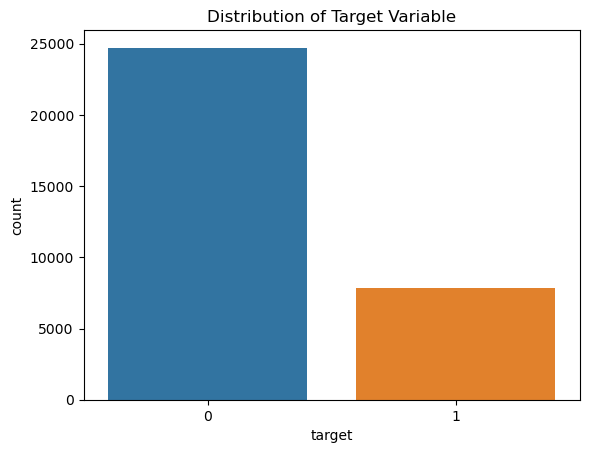

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=train_df)
plt.title('Distribution of Target Variable')
plt.show()

In [ ]:
### 1. Are all the columns necessary or can we drop any?
###  .Feature Importance Analysis:

In [10]:
# Select only numeric columns
numeric_features = train_df.select_dtypes(include=['int64', 'float64'])
corr = numeric_features.corr()



In [11]:
### Calculate the Correlation Matrix:

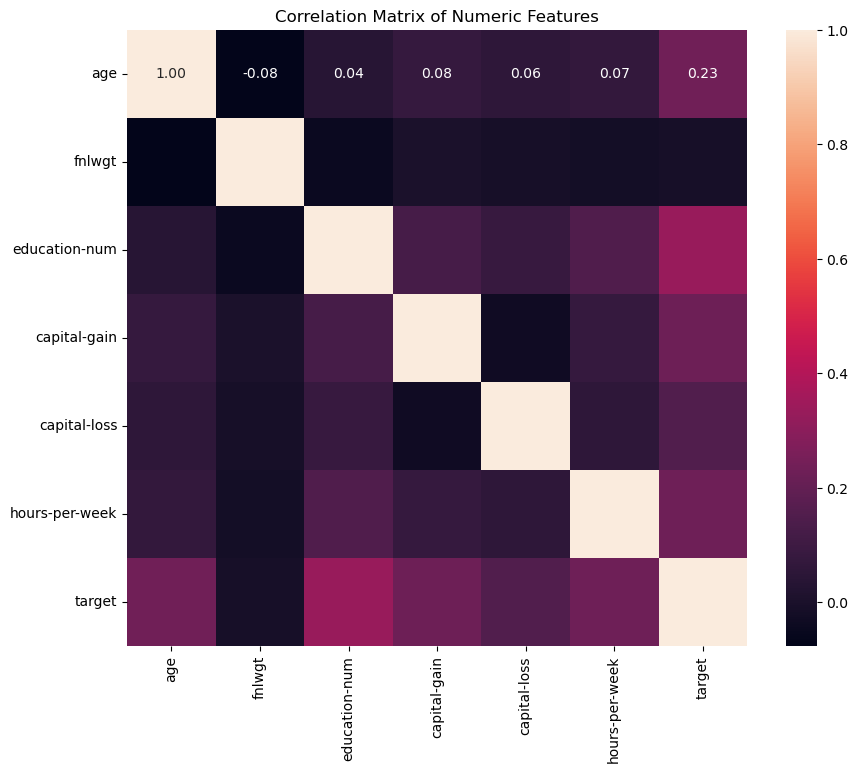

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()
